In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS')
Lin = LinData.LinData_Class(param)
f = pd.read_table(param['HorSpath']+param['simname']+'/h5_data.csv', delimiter=',')
param64 = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS')
Lin64 = LinData.LinData_Class(param64)
f64 = pd.read_table(param64['HorSpath']+param64['simname']+'/h5_data.csv', delimiter=',')
param32 = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS')
Lin32 = LinData.LinData_Class(param32)
f32 = pd.read_table(param32['HorSpath']+param32['simname']+'/h5_data.csv', delimiter=',')

 read time file
 read time file
 read time file


In [3]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

def lin_fit(x, y, i, x_final):
    a = (y[i]-y[i+1])/(x[i]-x[i+1])
    b = y[i]-x[i]*a
    return a*x_final+b

def rev_lin_fit(x, y, i, y_final):
    a = (y[i]-y[i+1])/(x[i]-x[i+1])
    b = y[i]-x[i]*a
    return (y_final-b)/a

In [4]:
# At crash
d128 = np.array(f['drho_OD'])[-1]
d64 = np.array(f64['drho_OD'])[-1]
d32 = np.array(f32['drho_OD'])[-1]
c = abs(d32-d64)/abs(d64-d128)
err = abs((d64-d128)/(c-1))
print(d128, err) #2e6 $\pm$ 2e6

2321469.468762651 2310503.097327352


In [5]:
# At virialisation
((6*np.pi)**2)/2 - 1

176.65287921960845

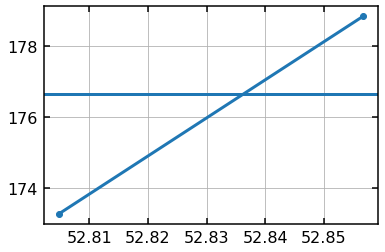

In [19]:
imin = 677
imax = 679
plt.plot(Lin.an_initial(f['t'])[imin:imax], f['drho_OD'][imin:imax])
plt.scatter(Lin.an_initial(f['t'])[imin:imax], f['drho_OD'][imin:imax])
plt.axhline(y=176.65)
plt.grid()

In [20]:
d128 = rev_lin_fit(Lin.an_initial(f['t']), f['drho_OD'], 677, 176.65)
d64 = rev_lin_fit(Lin.an_initial(f64['t']), f64['drho_OD'], 338, 176.65)
d32 = rev_lin_fit(Lin.an_initial(f32['t']), f32['drho_OD'], 169, 176.65)
c = abs(d32-d64)/abs(d64-d128)
err = abs((d64-d128)/(c-1))
print(d128, err) #52.83625 $\pm$ 7e-5

52.83625331394341 6.796298225794842e-05


In [50]:
# At virialisation
((9*np.pi + 6)**2)/8 - 1

145.841245384492

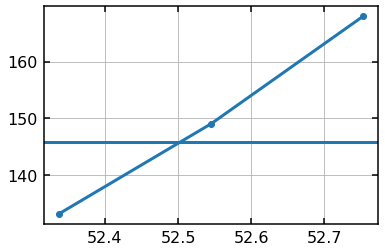

In [36]:
imin = 167
imax = 170
plt.plot(Lin.an_initial(f32['t'])[imin:imax], f32['drho_OD'][imin:imax])
plt.scatter(Lin.an_initial(f32['t'])[imin:imax], f32['drho_OD'][imin:imax])
plt.axhline(y=145.84)
plt.grid()

In [38]:
d128 = rev_lin_fit(Lin.an_initial(f['t']), f['drho_OD'], 671, 145.84)
d64 = rev_lin_fit(Lin.an_initial(f64['t']), f64['drho_OD'], 335, 145.84)
d32 = rev_lin_fit(Lin.an_initial(f32['t']), f32['drho_OD'], 167, 145.84)
c = abs(d32-d64)/abs(d64-d128)
err = abs((d64-d128)/(c-1))
print(d128, err) #52.5055 $\pm$ 9e-4

52.50545124480901 0.0008566862273747404
